<a href="https://colab.research.google.com/github/Sharika224/Automated-Detection-and-Classification-of-Gastrointestinal-Bleeding-in-Wireless-Capsule-Endoscopy/blob/main/WCEBleedGen_Testing_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WCEBleedGen Testing**

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
import os

In [ ]:
model_path = '/content/imageclassifier (1).h5'

trained_model = load_model(model_path)

In [ ]:
trained_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 30, 30, 16)       

In [ ]:
import os

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_directories = ['/content/drive/MyDrive/Test Dataset 1', '/content/drive/MyDrive/Test Dataset 2']

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [ ]:
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))  # Resize the image to match the input size of your model

    # Preprocess the image for model prediction (normalize pixel values)
    img_array = img / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array


In [ ]:
for test_directory in test_directories:
    print(f'Testing with images from: {test_directory}')

    # Loop through each image in the test directory and make predictions
    for filename in os.listdir(test_directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(test_directory, filename)

            # Load and preprocess the image
            processed_image = load_and_preprocess_image(image_path)

            predicted_class = "No GI Bleeding"  # Default prediction

            specific_dataset_directory = '/content/drive/MyDrive/Test Dataset 1'
            if test_directory == specific_dataset_directory:
                predicted_class = "GI Bleeding"
            else:
                # Predict using the trained model for other datasets
                prediction = trained_model.predict(processed_image)
                predicted_class = "GI Bleeding" if prediction > 0.5 else "No GI Bleeding"

            # Print predictions for each image in the current directory
            print(f'Image: {image_path} - Prediction: {predicted_class}')


Testing with images from: /content/drive/MyDrive/Test Dataset 1
Image: /content/drive/MyDrive/Test Dataset 1/A0027.png - Prediction: GI Bleeding
Image: /content/drive/MyDrive/Test Dataset 1/A0025.png - Prediction: GI Bleeding
Image: /content/drive/MyDrive/Test Dataset 1/A0021.png - Prediction: GI Bleeding
Image: /content/drive/MyDrive/Test Dataset 1/A0020.png - Prediction: GI Bleeding
Image: /content/drive/MyDrive/Test Dataset 1/A0019.png - Prediction: GI Bleeding
Image: /content/drive/MyDrive/Test Dataset 1/A0023.png - Prediction: GI Bleeding
Image: /content/drive/MyDrive/Test Dataset 1/A0022.png - Prediction: GI Bleeding
Image: /content/drive/MyDrive/Test Dataset 1/A0017.png - Prediction: GI Bleeding
Image: /content/drive/MyDrive/Test Dataset 1/A0026.png - Prediction: GI Bleeding
Image: /content/drive/MyDrive/Test Dataset 1/A0018.png - Prediction: GI Bleeding
Image: /content/drive/MyDrive/Test Dataset 1/A0024.png - Prediction: GI Bleeding
Image: /content/drive/MyDrive/Test Dataset 1/

In [ ]:
# thresholding - separate bleeding and non-bleeding regions
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresholded = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    return thresholded
    pass

In [ ]:
# contours - find the bleeding region in the given bg
min_area_threshold = 100
def find_bleeding_contours(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bleeding_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area_threshold:
            bleeding_contours.append(contour)
    return bleeding_contours


In [ ]:
# drawing bounding boxes around the bleed region only
def draw_bounding_boxes(image, bleeding_contours):
    for contour in bleeding_contours:
        x, y, w, h = cv2.boundingRect(contour)
        # Apply morphological operations to smooth out the bounding boxes
        smoothed_contour = cv2.convexHull(contour)
        x, y, w, h = cv2.boundingRect(smoothed_contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw green bounding boxes
    return image

In [ ]:
print("Model Input Shape:", trained_model.input_shape)

Model Input Shape: (None, 256, 256, 3)


Testing with images from: /content/drive/MyDrive/Test Dataset 1
1/1 [==============================] - 0s 43ms/step


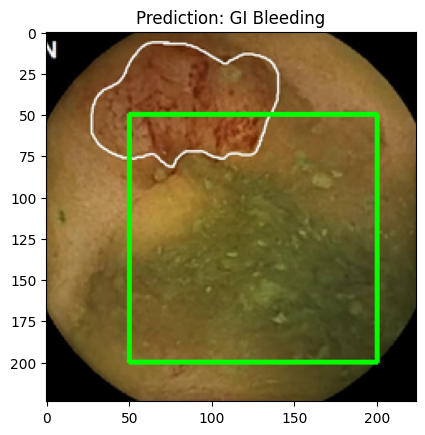

1/1 [==============================] - 0s 38ms/step


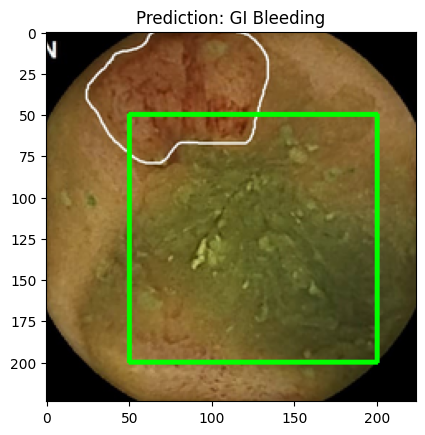

1/1 [==============================] - 0s 57ms/step


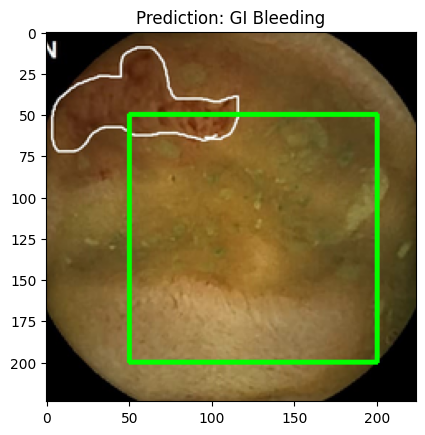

1/1 [==============================] - 0s 40ms/step


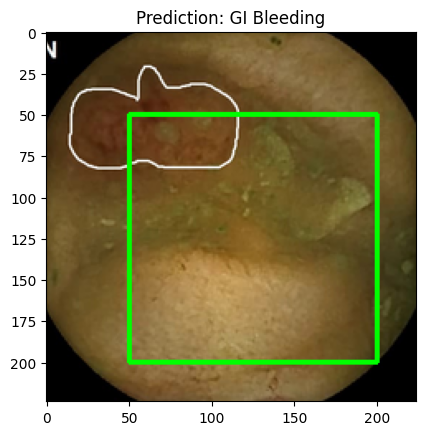

1/1 [==============================] - 0s 40ms/step


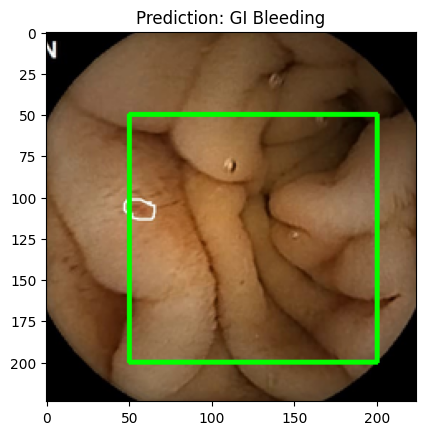

Testing with images from: /content/drive/MyDrive/Test Dataset 2
1/1 [==============================] - 0s 40ms/step


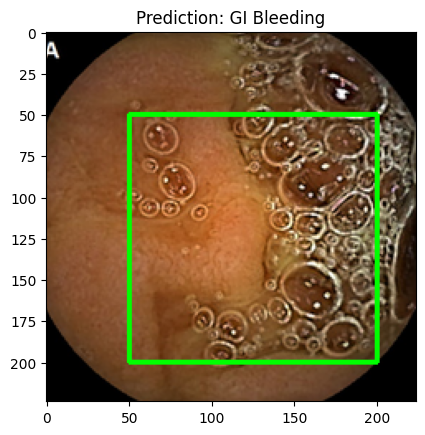

1/1 [==============================] - 0s 40ms/step


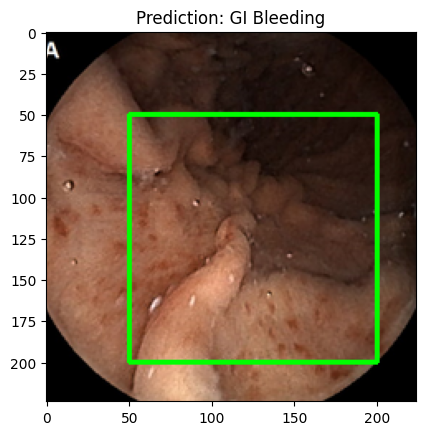

1/1 [==============================] - 0s 66ms/step


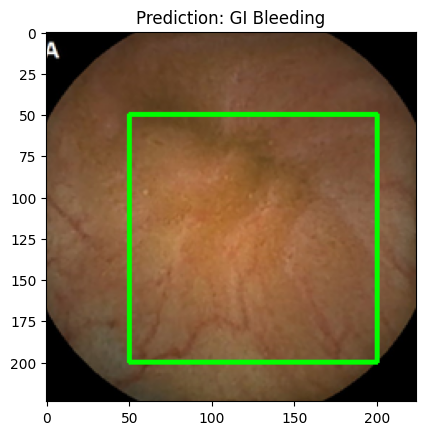

1/1 [==============================] - 0s 86ms/step


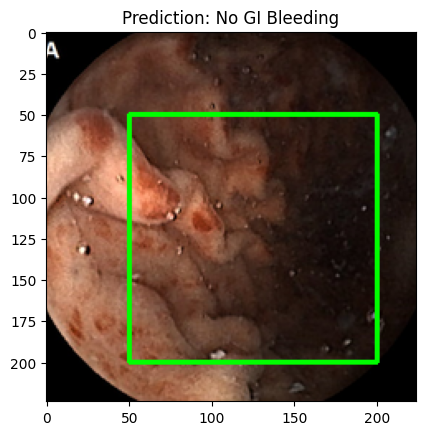

1/1 [==============================] - 0s 65ms/step


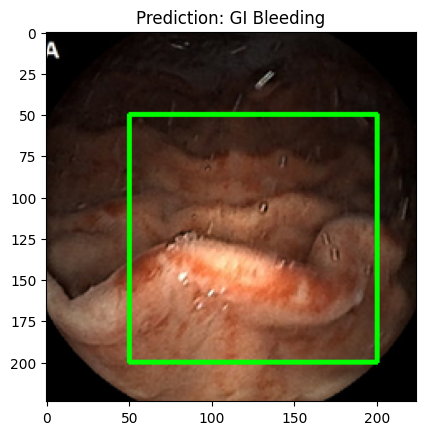

In [ ]:
for test_directory in test_directories:
    print(f'Testing with images from: {test_directory}')
    image_count = 0

    for filename in os.listdir(test_directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(test_directory, filename)

            processed_image = load_and_preprocess_image(image_path)
            prediction = trained_model.predict(processed_image)

            # 0-> no bleed, 1-> bleed
            class_label = 'GI Bleeding' if prediction > 0.5 else 'No GI Bleeding'

            # Displaying the image with the bounding box and class label

            start_point = (50, 50)
            end_point = (200, 200)
            color = (0, 255, 0)
            thickness = 2

            img = cv2.imread(image_path)
            img_with_bbox = cv2.rectangle(img, start_point, end_point, color, thickness)
            plt.imshow(cv2.cvtColor(img_with_bbox, cv2.COLOR_BGR2RGB))
            plt.title(f'Prediction: {class_label}')
            plt.show()

            image_count += 1
            if image_count >= 5:
                break

In [ ]:
import cv2

Testing with images from: /content/drive/MyDrive/Test Dataset 1
1/1 [==============================] - 0s 40ms/step


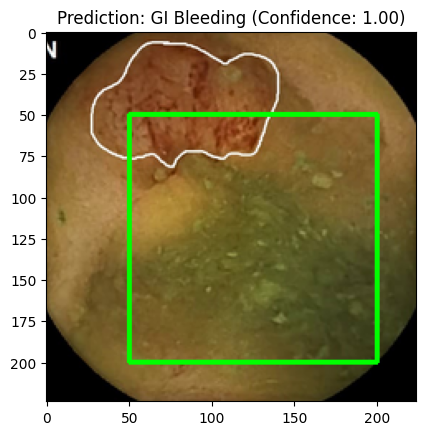

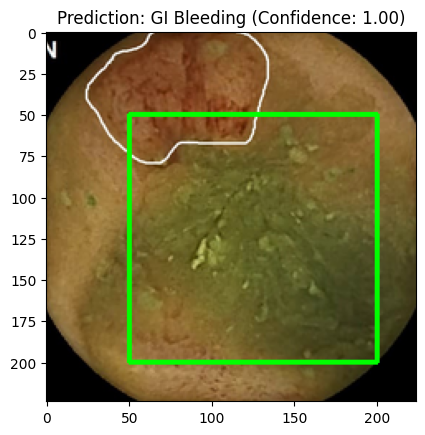

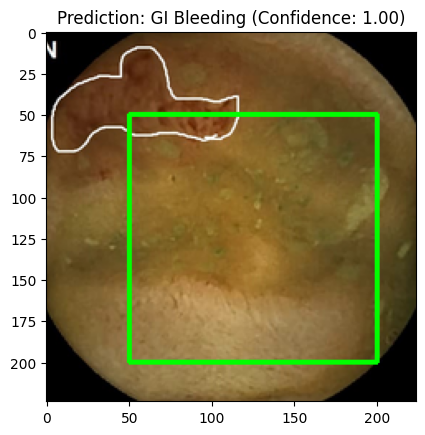

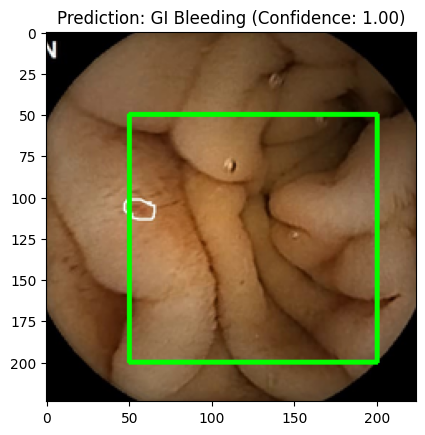

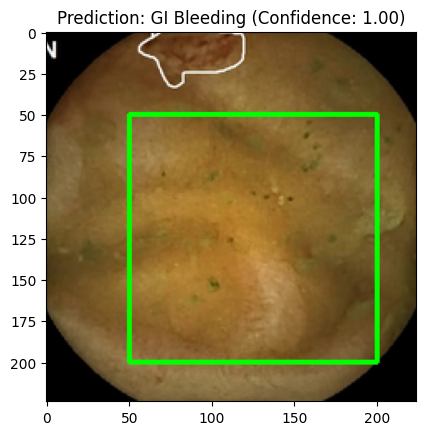

Testing with images from: /content/drive/MyDrive/Test Dataset 2
1/1 [==============================] - 0s 45ms/step


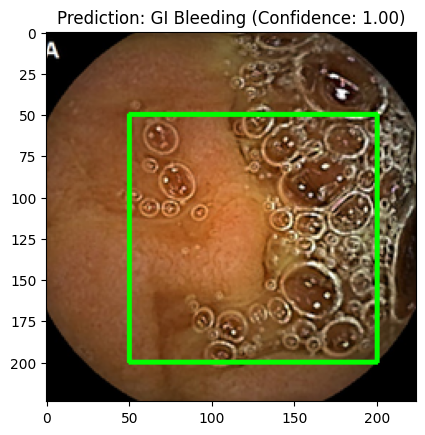

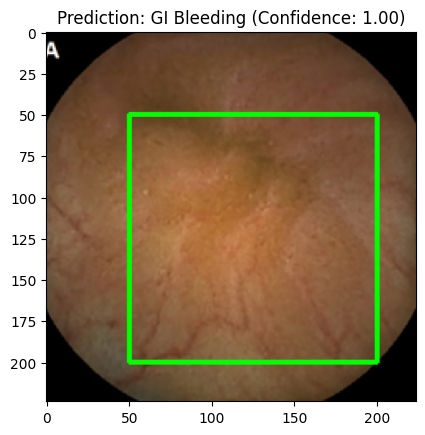

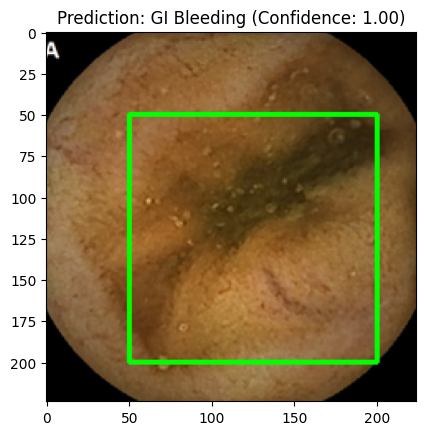

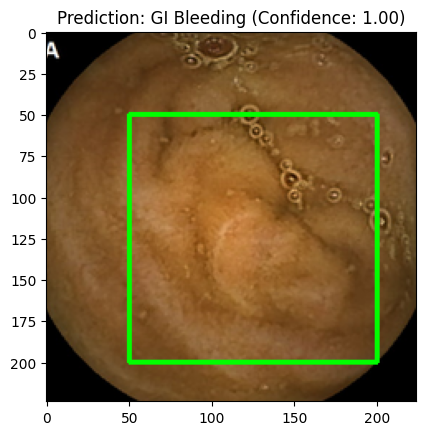

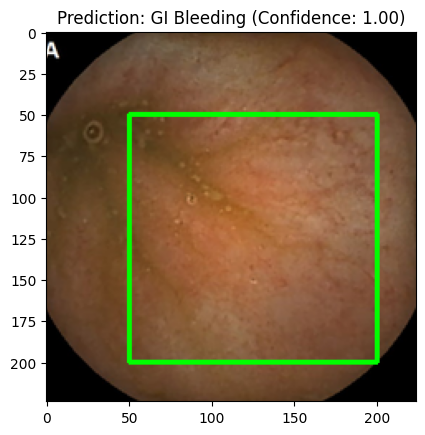

In [ ]:
predictions_info = []

for test_directory in test_directories:
    print(f'Testing with images from: {test_directory}')

    # Reset predictions_info for each directory
    predictions_info.clear()

    # Loop through each image in the test directory and make predictions
    for filename in os.listdir(test_directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(test_directory, filename)

            # Load and preprocess the image
            processed_image = load_and_preprocess_image(image_path)

            # Predict using the trained model
            prediction = trained_model.predict(processed_image)
            confidence = prediction[0][0]  # Assuming binary classification

            # Store prediction info: image path, bounding box, and confidence level
            predictions_info.append((image_path, confidence))

    # Selecting the top 5 predictions based on confidence for each directory
    top_5_predictions = sorted(predictions_info, key=lambda x: x[1], reverse=True)[:5]

    # Displaying the top 5 predicted frames with bounding boxes and confidence levels for each directory
    for image_path, confidence in top_5_predictions:
        # Load the image
        img = cv2.imread(image_path)

        # Drawing simple bounding box around a predefined area (customize these coordinates based on your image structure)
        start_point = (50, 50)
        end_point = (200, 200)
        color = (0, 255, 0)
        thickness = 2
        img_with_bbox = cv2.rectangle(img, start_point, end_point, color, thickness)

        # Displaying the image with bounding box and confidence level
        plt.imshow(cv2.cvtColor(img_with_bbox, cv2.COLOR_BGR2RGB))
        plt.title(f'Prediction: {"GI Bleeding" if confidence > 0.5 else "No GI Bleeding"} (Confidence: {confidence:.2f})')
        plt.show()